In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy
import sys
import tensorflow as tf

Using TensorFlow backend.


In [47]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [14]:
# xTrain.shape#60000,28*28
# xTest.shape#10000,28*28
yTrain.shape#60000

(60000,)

In [15]:
import matplotlib.pyplot as plt

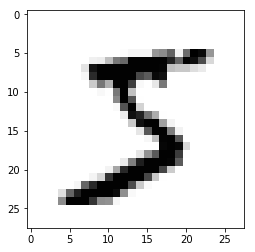

In [16]:
plt.imshow(xTrain[0],cmap='Greys')
plt.show()

In [17]:
for x in xTrain[0]:
    for i in x:
        sys.stdout.write("%d\t"%i)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [48]:
xTrain=xTrain.reshape(xTrain.shape[0],784)
xTrain=xTrain.astype('float64')
xTrain=xTrain/255
xTest=xTest.reshape(xTest.shape[0],784).astype('float64')/255


In [19]:
print(yTrain[0])

5


In [49]:
yTrain=np_utils.to_categorical(yTrain,10)
yTest=np_utils.to_categorical(yTest,10)

In [21]:
yTrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
import os

In [32]:
#모델 구성
model=Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [33]:
#모델 환경 설정
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [34]:
#모델 최적화
modelDir='./myModel/'#.의 의미는 현재 디렉토리
#만약 myModel 디렉토리가 존재하지 않는다면
if not os.path.exists(modelDir):
    modelPath="./myModel/{epoch:02d}-{val_loss:.4f}.hdf5"
    os.mkdir(modelDir)
checkpointer=ModelCheckpoint(filepath=modelPath,monitor='val_loss',verbose=1,save_best_only=True)
#ModelChekpint 콜백 함수: keras에서 모델을 학습할때마다 중간중간 
#콜백 형태로 알려주는 역할
#save_best_only : 모델의 정확도가 최고값을 갱신했을때만 저장
es=EarlyStopping(monitor='val_loss',patience=10)

In [37]:
#모델 생성
history=model.fit(xTrain,yTrain,validation_data=(xTest,yTest),
                  epochs=30,batch_size=200,callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 49us/step - loss: 6.4946e-04 - accuracy: 1.0000 - val_loss: 0.0695 - val_accuracy: 0.9835

Epoch 00001: val_loss did not improve from 0.06079
Epoch 2/30
60000/60000 [==============================] - 3s 48us/step - loss: 4.4505e-04 - accuracy: 1.0000 - val_loss: 0.0690 - val_accuracy: 0.9834

Epoch 00002: val_loss did not improve from 0.06079
Epoch 3/30
60000/60000 [==============================] - 3s 48us/step - loss: 3.5356e-04 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 0.9833

Epoch 00003: val_loss did not improve from 0.06079
Epoch 4/30
60000/60000 [==============================] - 3s 48us/step - loss: 2.9993e-04 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9836

Epoch 00004: val_loss did not improve from 0.06079
Epoch 5/30
60000/60000 [==============================] - 3s 48us/step - loss: 2.6448e-04 - accuracy: 1.0000 - val_loss: 0.0715 - val_accu

In [36]:
print("테스트 정확도: %.4f"%(model.evaluate(xTest,yTest)[1]))

10000/10000 [==============================] - 0s 42us/step
테스트 정확도: 0.9821


In [38]:
#테스트 셋의 오차
yVloss=history.history['val_loss']
#학습 셋의 오차
yLoss=history.history['loss']

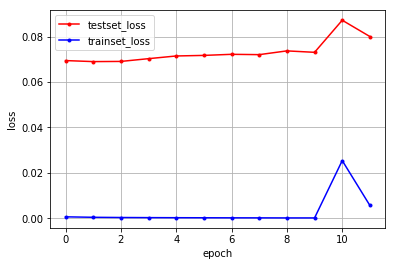

In [41]:
xLen=np.arange(len(yLoss))
plt.plot(xLen,yVloss,marker='.',c='red',label='testset_loss')
plt.plot(xLen,yLoss,marker='.',c='blue',label='trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# CNN으로 MNIST 모델 만들기

In [43]:
from keras.layers import *

In [44]:
#모델 구성
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
#Conv2D(필터개수,필터크기,(행,열,흑백),활성화함수)
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) #드롭아웃 비율(25%)
#Flatten():1차원으로 변경하는 함수
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [45]:
#모델 환경 설정
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [46]:
#모델 최적화
modelDir='./myCnnModel/'#.의 의미는 현재 디렉토리
#만약 myModel 디렉토리가 존재하지 않는다면
if not os.path.exists(modelDir):
    modelPath="./myCnnModel/{epoch:02d}-{val_loss:.4f}.hdf5"
    os.mkdir(modelDir)
checkpointer=ModelCheckpoint(filepath=modelPath,monitor='val_loss',verbose=1,save_best_only=True)
#ModelChekpint 콜백 함수: keras에서 모델을 학습할때마다 중간중간 
#콜백 형태로 알려주는 역할
#save_best_only : 모델의 정확도가 최고값을 갱신했을때만 저장
es=EarlyStopping(monitor='val_loss',patience=10)

In [52]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()
xTrain=xTrain.reshape(xTrain.shape[0],28,28,1).astype('float32')/255
xTest=xTest.reshape(xTest.shape[0],28,28,1).astype('float32')/255
yTrain=np_utils.to_categorical(yTrain)
yTest=np_utils.to_categorical(yTest)

In [53]:
#모델 생성
history=model.fit(xTrain,yTrain,validation_data=(xTest,yTest),
                  epochs=30,batch_size=200,callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2806 - accuracy: 0.9141 - val_loss: 0.0579 - val_accuracy: 0.9813

Epoch 00001: val_loss improved from inf to 0.05792, saving model to ./myCnnModel/01-0.0579.hdf5
Epoch 2/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0893 - accuracy: 0.9740 - val_loss: 0.0417 - val_accuracy: 0.9858

Epoch 00002: val_loss improved from 0.05792 to 0.04169, saving model to ./myCnnModel/02-0.0417.hdf5
Epoch 3/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0356 - val_accuracy: 0.9883

Epoch 00003: val_loss improved from 0.04169 to 0.03559, saving model to ./myCnnModel/03-0.0356.hdf5
Epoch 4/30
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0324 - val_accuracy: 0.9891

Epoch 00004: val_loss improved from 0.03559 to 0.03243, saving

In [ ]:
# model.save("파일명.h5")
from keras.models import load_model
model=load_model("모델파일명.h5")
model.summary()#모델 구조
# 분류결과=model.predict_classes(테드스 데이터)

In [54]:
#예측이 틀린 이미지를 8개 출력
# ex) label:9, pred:4  ...  label:1, pred:4
#         9 이미지               1이미지
#     label:9, pred:4  ...  label:1, pred:4
#         9 이미지               1이미지
# 2*4 형태로 틀린 예측 결과 출력

In [55]:
#이터레이터, 제너레이터
#iterator:값을 차례대로 꺼낼 수 있는 객체
#for i in range(100):
#정확한 의미:0~99까지 값을 차례대로 꺼낼 수 있는 이터레이터 객체 생성

In [63]:
#iterable(반복가능객체, 문자열, 딕셔너리, 리스트)
#객체가 iter메서드를 포함 여부:객체가 반복 가능한지 확인
dir([1,2,3]) #__iter__존재하면 for문 사용가능
it=[1,2,3].__iter__()
it.__next__()#1
it.__next__()#2
it.__next__()#3
it.__next__()#error

StopIteration: 

In [64]:
"hello".__iter__()
{'a':1,'b':2}.__iter__()
{1,2,3}.__iter__()

In [65]:
it=range(3).__iter__()
it.__next__()#0
it.__next__()#1
it.__next__()#2
it.__next__()#error

StopIteration: 

In [66]:
for i in range(3):
    print(i)
#1.range에서 __iter__로 이터레이터 객체 생성
#2.반복할때마다 이터레이터에서 __next__를 
#호출해서 숫자를 꺼내서 i에 저장

0
1
2


In [67]:
#내가 만든 클래스에 __iter__, __next__
#두 메서드를 구현하면, 이터레이터 생성 가능

In [73]:
class MyCounter:
    def __getitem__(self,index):
        if index<self.stop:
            return index
        else:
            raise StopIteration
            
    def __init__(self,stop):
        self.current=0
        self.stop=stop
#     def __iter__(self):
#         return self
#     def __next__(self):
#         if self.current<self.stop:
#             r=self.current
#             self.current+=1
#             return r
#         else:
#             raise StopIteration
# for i in MyCounter(3):
#     print(i)# 0 1 2 3 4

In [70]:
a,b,c=map(int,input().split())

1 2 3


In [71]:
print(a)

1


In [76]:
#MyCounter(3)[0]
for i in MyCounter(3):
    print(i)

0
1
2


In [79]:
#파이썬 iter함수:객체의 __iter__ 메서드를 호출
#파이썬 iter함수:객체의 __next__ 메서드를 호출
it=iter(range(3))
next(it)#0
next(it)#1
next(it)#2

2

In [85]:
# iter(객체,방복을 끝낼 값)
import random
# random.randint(0,5)#0~5까지 무작위 난수
it=iter(lambda:random.randint(0,5),2)#2가 드면 stop
next(it)
next(it)
next(it)
next(it)

StopIteration: 

In [86]:
#제너레이터:이터레이터를 생성하는 함수
#함수 내부에 yield 키워드를 주면 이터레이터가 생성됨
def myGen():
    yield 0
    yield 1
    yield 2

In [87]:
for i in myGen():
    print(i)

0
1
2


In [88]:
mg=myGen()
dir(mg)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [89]:
# keras.io->ImageDataGenerator

In [90]:
#1.이미지제너레이터 클래스 객체 생성
#2. flow_from_directory() 호출 -> 제너레이터 생성

from keras.preprocessing.image import ImageDataGenerator

In [103]:
trainDataGen=ImageDataGenerator(rescale=1./255)
trainGenerator=trainDataGen.flow_from_directory(
    'C:/Users/student/Downloads/Python_JP/do/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [104]:
testDataGen=ImageDataGenerator(rescale=1./255)
testGenerator=testDataGen.flow_from_directory(
    'C:/Users/student/Downloads/Python_JP/do/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [105]:
#크기(24,24), 채널:3, 필터:3*3, 필터개수:32, relu
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=(24,24,3)))
#필터:3*3, 필터개수:64, relu
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
#maxpool:2*2
model.add(MaxPooling2D(pool_size=(2,2)))
#플래튼->Dense(128개 뉴런 출력)->Dense(softmax)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [106]:
model.summary()
#84만개의 파라미터 학습

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               819328    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

In [107]:
#모델 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [108]:
#fit_generator():제너레이터로 생성된 데이터 학습
model.fit_generator(
    trainGenerator,#훈련데이터 제너레이터 
    steps_per_epoch=15,
    epochs=50,
    validation_data=testGenerator,
    validation_steps=5
)

Epoch 1/50
15/15 [==============================] - 1s 42ms/step - loss: 1.1000 - accuracy: 0.5333 - val_loss: 0.7257 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 16ms/step - loss: 0.3387 - accuracy: 0.9778 - val_loss: 0.0313 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0157 - val_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0735 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 8.7950e-04 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 18ms/step - loss: 6.7148e-04 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch

In [111]:
scores=model.evaluate_generator(
    testGenerator,
    steps=5
)
print(scores)

[2.6503703338676132e-05, 1.0]


In [112]:
res=model.predict_generator(
    testGenerator,
    steps=5
)
print(res)

[[7.5996511e-02 7.9329872e-01 1.3070472e-01]
 [2.1834287e-10 5.1622578e-06 9.9999487e-01]
 [2.9969416e-09 1.9209038e-07 9.9999976e-01]
 [9.9946839e-01 1.7913061e-04 3.5253828e-04]
 [3.6596336e-06 3.2551974e-02 9.6744442e-01]
 [1.0671573e-07 4.0434385e-05 9.9995947e-01]
 [7.8261746e-07 4.7530374e-03 9.9524623e-01]
 [1.1764277e-05 9.9998367e-01 4.5594284e-06]
 [5.2326359e-06 9.9999475e-01 2.5787234e-08]
 [2.9889738e-06 9.9999678e-01 2.7635883e-07]
 [9.9956614e-01 4.2805800e-04 5.8008413e-06]
 [9.9996459e-01 3.5297591e-05 9.5731224e-08]
 [9.9999583e-01 4.1979306e-06 4.1153886e-08]
 [4.4970755e-05 9.9995458e-01 4.2975563e-07]
 [9.9997008e-01 2.9083028e-05 8.5008503e-07]]


In [113]:
"""
-rotaion_range : 회전, 90(0~90도 사이 랜덤)
-width_shift_range : 이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 좌/우 랜덤 이동)
막혀있으면 이미지 잘림
-height_shift_ragne : 이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 상/하 랜덤 이동)
-shear_range : 변형, 라디안, 0.5(반시계방향 밀어서 변행) 
-zoom_range : 축소, 0.3(0.7~1.3 사이의 크기로 랜덤하게...)
-horizontal_flip : 수평축으로 뒤집기
-vertical_flip : 수직축으로 뒤집기
"""

'\n-rotaion_range : 회전, 90(0~90도 사이 랜덤)\n-width_shift_range : 이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 좌/우 랜덤 이동)\n막혀있으면 이미지 잘림\n-height_shift_ragne : 이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 상/하 랜덤 이동)\n-shear_range : 변형, 라디안, 0.5(반시계방향 밀어서 변행) \n-zoom_range : 축소, 0.3(0.7~1.3 사이의 크기로 랜덤하게...)\n-horizontal_flip : 수평축으로 뒤집기\n-vertical_flip : 수직축으로 뒤집기\n'

In [114]:
from keras.preprocessing.image import array_to_img, img_to_array,load_img

In [115]:
augGen=ImageDataGenerator(rescale=1./255,
                  rotation_range=15,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   shear_range=0.5,
                   zoom_range=[0.8,2.0],#0.8배~2배 사이
                   horizontal_flip=True,
                   vertical_flip=True,
                   fill_mode='nearest'#테두리가 옅은색상??                   
                  )

In [116]:
img=load_img('C:/Users/student/Downloads/Python_JP/do/train/triangle/triangle001.png')

In [121]:
x=img_to_array(img)
x.shape # 24,24,3
x=x.reshape((1,)+x.shape)
x.shape # 1, 24, 24, 3

(1, 24, 24, 3)

In [122]:
i=0
for batch in augGen.flow(x,batch_size=1,
                         save_to_dir='C:/Users/student/Downloads/Python_JP/store',
                         save_prefix='tri',
                         save_format='png'):
    i+=1
    if i>50:
        break